# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Automatic feature selection



# Theoretical recal
<hr style="border:2px solid black"> </hr>


- When working with high-dimensional datasets in general, it can be a good idea to reduce the number of features to only the most useful ones, and discard the rest. 
- This can lead to simpler models that generalize better. 
- That is to say the the chance of overfitting is reduced.

- There are three basic strategies to establish how good each feature:
    - [1] Univariate statistics
    - [2] Model-based selection
    - [3] Iterative selection



# Import modules
<hr style="border:2px solid black"> </hr>

In [27]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
rcParams['figure.figsize'] = 14, 5
rcParams['font.size'] = 20

# Load the dataset
<hr style="border:2px solid black"> </hr>


- To make the task a bit harder, we’ll add some noninformative noise features to the data. 
- We expect the feature selection to be able to identify the features that are noninformative and remove them.



In [7]:
cancer = load_breast_cancer()

In [8]:
# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)


# Univariate statistics
<hr style="border:2px solid black"> </hr>


- Univariate means that they only consider each feature individually. Consequently, a feature will be discarded if it 
is only informative when combined with another feature. Univariate tests are often very fast.
- In univariate statistics, we compute whether there is a statistically significant relationship between each feature
and the target. Then the features that are related with the highest confidence are selected. In the case of 
classification, this is also known as analysis of variance (ANOVA). 



In [6]:
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))


X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)



- As you can see, the number of features was reduced from 80 to 40 (50 percent of the original number of features). 
- We can find out which features have been selected using the get_support method, which returns a Boolean mask of 
the selected features



In [15]:
mask = select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], [])

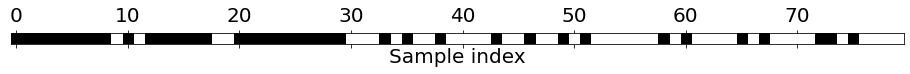

In [16]:
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())


- As you can see from the visualization of the mask, most of the selected features are the original features, and most of the noise features were removed. 
- However, the recovery of the original features is not perfect. 
- Let’s compare the performance of logistic regression on all features against the performance using only the selected 
features



# Model-Based Feature Selection
<hr style="border:2px solid black"> </hr>


- Model-based feature selection uses a supervised machine learning model to judge the importance of each feature, 
and keeps only the most important ones. Examples are:

    - [1] Decision trees and decision tree–based models provide a feature_importances_
    - [2] Linear models with L1 penalty learn sparse coefficients, which only use a small subset of features
    
- In contrast to univariate selection, model-based selection considers all features at once, and so can capture 
interactions (if the model can capture them).  



In [21]:
# We use the median as a threshold, so that half of the features will be selected
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [22]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


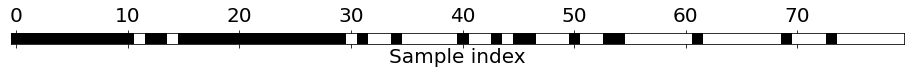

In [24]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(());


- This time, all but two of the original features were selected. Because we specified to select 40 features, 
some of the noise features are also selected.



# Iterative feature selection
<hr style="border:2px solid black"> </hr>


- In univariate testing we used no model, while in model-based selection we used a single model to select features. 
- In iterative feature selection, a series of models are built, with varying numbers of features. 
- There are two basic methods: starting with no fea‐ tures and adding features one by one until some stopping criterion is reached, or starting with all features and removing features one by one until some stopping criterion is reached.
- One particular method of this kind is recursive feature elimination (RFE).



In [29]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False False False
 False False False False False False False False False False False  True
  True False  True False False  True  True False False False  True False
 False False False False False  True False  True False False False False
 False  True False False False  True False False]


([], [])

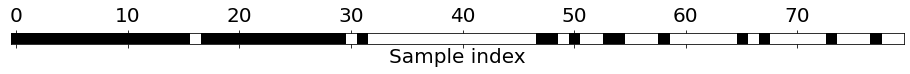

In [30]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())


- The feature selection got better compared to the univariate and model-based selection, but one feature was 
still missed. Running this code also takes significantly longer than that for the model-based selection, because 
a random forest model is trained 40 times, once for each feature that is dropped  



# Conclusions
<hr style="border:2px solid black"> </hr>


- Feature selection is great for reducing the amount of features needed—for example, to speed up prediction or to  allow for more interpretable models. 
- In most real-world cases, applying feature selection is **UNLIKELY** to provide large gains in performance. 



# References
<hr style="border:2px solid black"> </hr>


- Guido, Sarah, and Andreas Müller. Introduction to machine learning with python. Vol. 282. O'Reilly Media, 2016.
- [Code from the book on GitHub](https://github.com/amueller/introduction_to_ml_with_python)

